In [1]:
!pip install pandas numpy matplotlib statsmodels seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import norm

# Load data
ES1skip_csv_file = r'1min-ES-skip.csv'
ES1hold_csv_file = r'1min-ES-holdlastvalue.csv'
FT1skip_csv_file = r'1min-FT-skip.csv'
FT1hold_csv_file = r'1min-FT-holdlastvalue.csv'

# Read csv files
df_ES1skip = pd.read_csv(ES1skip_csv_file)
df_ES1hold = pd.read_csv(ES1hold_csv_file)
df_FT1skip = pd.read_csv(FT1skip_csv_file)
df_FT1hold = pd.read_csv(FT1hold_csv_file)

In [2]:
# Define ES day session
day_session_start = '09:30'
day_session_end = '16:00'

# Create day session only dataframes
df_ES1skip_day = df_ES1skip[
    (df_ES1skip['Time'] >= day_session_start)
    & (df_ES1skip['Time'] <= day_session_end)
].copy()

df_ES1hold_day = df_ES1hold[
    (df_ES1hold['Time'] >= day_session_start)
    & (df_ES1hold['Time'] <= day_session_end)
].copy()

In [3]:
def compute_returns(data, tau):
    """
    Compute returns over a time lag tau.
    Parameters:
    - data: DataFrame with 'Close' column and datetime index
    - tau: Time lag in minutes (integer)
    Returns:
    - Series of returns
    """
    prices = data['Close']
    # Shift(-tau) moves prices tau minutes forward
    returns = prices.shift(-tau) - prices
    return returns.dropna()

# Define the range of tau values
# 1 to 10,000 minutes, but for computational ease I just use some of them, where I think shorter time lag is more important
tau_values = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 5000, 6000, 7000, 8000, 9000, 10000
]

# Initialize lists to store sigma(tau) for ES and FT
sigma_es_skip_full = []
sigma_es_hold_full = []
sigma_es_skip_day = []
sigma_es_hold_day = []
sigma_ft_hold = []
sigma_ft_skip = []

# Compute sigma(tau) for each tau
for tau in tau_values:
    # ES Full Session with Skip: returns and volatility
    returns_es_skip_full = compute_returns(df_ES1skip, tau)
    sigma_es_skip_full.append(returns_es_skip_full.std())

    # ES Full Session with Hold: returns and volatility
    returns_es_hold_full = compute_returns(df_ES1hold, tau)
    sigma_es_hold_full.append(returns_es_hold_full.std())

    # ES Day Session with Skip: returns and volatility
    returns_es_skip_day = compute_returns(df_ES1skip_day, tau)
    sigma_es_skip_day.append(returns_es_skip_day.std())

    # ES Day Session with Hold: returns and volatility
    returns_es_hold_day = compute_returns(df_ES1hold_day, tau)
    sigma_es_hold_day.append(returns_es_hold_day.std())

    # FT Day Session with Skip: returns and volatility
    returns_ft_skip = compute_returns(df_FT1skip, tau)
    sigma_ft_skip.append(returns_ft_skip.std())

    # FT Day Session with Hold: returns and volatility
    returns_ft_hold = compute_returns(df_FT1hold, tau)
    sigma_ft_hold.append(returns_ft_hold.std())

# Convert lists to numpy arrays for easier manipulation
sigma_es_skip_full = np.array(sigma_es_skip_full)
sigma_es_hold_full = np.array(sigma_es_hold_full)
sigma_es_skip_day = np.array(sigma_es_skip_day)
sigma_es_hold_day = np.array(sigma_es_hold_day)
sigma_ft_skip = np.array(sigma_ft_skip)
sigma_ft_hold = np.array(sigma_ft_hold)

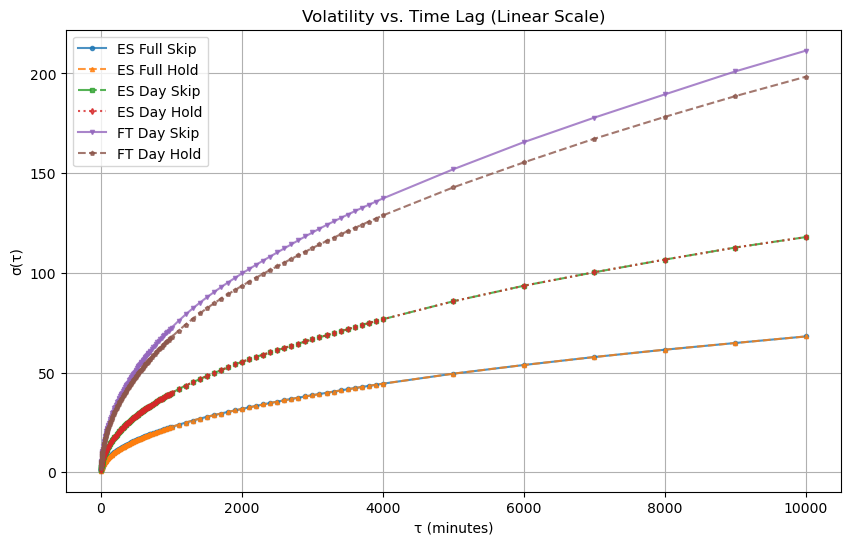

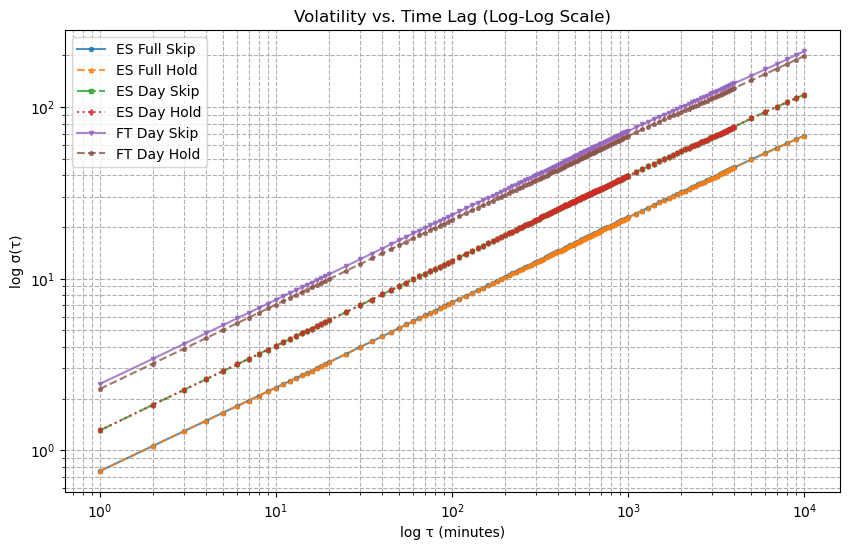

In [4]:
# Plot σ(τ) against τ on a linear scale to visualize the raw relationship:
plt.figure(figsize=(10, 6))
plt.plot(tau_values, sigma_es_skip_full, label='ES Full Skip', marker='o', markersize=3, linestyle='-', alpha=0.8)
plt.plot(tau_values, sigma_es_hold_full, label='ES Full Hold', marker='^', markersize=3, linestyle='--', alpha=0.8)
plt.plot(tau_values, sigma_es_skip_day, label='ES Day Skip', marker='s', markersize=3, linestyle='-.', alpha=0.8)
plt.plot(tau_values, sigma_es_hold_day, label='ES Day Hold', marker='d', markersize=3, linestyle=':', alpha=0.8)
plt.plot(tau_values, sigma_ft_skip, label='FT Day Skip', marker='v', markersize=3, linestyle='-', alpha=0.8)
plt.plot(tau_values, sigma_ft_hold, label='FT Day Hold', marker='p', markersize=3, linestyle='--', alpha=0.8)
plt.xlabel('τ (minutes)')
plt.ylabel('σ(τ)')
plt.title('Volatility vs. Time Lag (Linear Scale)')
plt.legend()
plt.grid(True)
plt.show()


# Plot σ(τ) against τ on a log-log scale to visualize the power-law relationship:
plt.figure(figsize=(10, 6))
plt.loglog(tau_values, sigma_es_skip_full, label='ES Full Skip', marker='o', markersize=3, linestyle='-', alpha=0.8)
plt.loglog(tau_values, sigma_es_hold_full, label='ES Full Hold', marker='^', markersize=3, linestyle='--', alpha=0.8)
plt.loglog(tau_values, sigma_es_skip_day, label='ES Day Skip', marker='s', markersize=3, linestyle='-.', alpha=0.8)
plt.loglog(tau_values, sigma_es_hold_day, label='ES Day Hold', marker='d', markersize=3, linestyle=':', alpha=0.8)
plt.loglog(tau_values, sigma_ft_skip, label='FT Day Skip', marker='v', markersize=3, linestyle='-', alpha=0.8)
plt.loglog(tau_values, sigma_ft_hold, label='FT Day Hold', marker='p', markersize=3, linestyle='--', alpha=0.8)
plt.xlabel('log τ (minutes)')
plt.ylabel('log σ(τ)')
plt.title('Volatility vs. Time Lag (Log-Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [5]:
# Fit a linear regression model to the log-log plot to estimate the power-law exponent α:
log_tau = np.log10(tau_values)
log_sigma_es_skip_full = np.log10(sigma_es_skip_full)
log_sigma_es_hold_full = np.log10(sigma_es_hold_full)
log_sigma_es_skip_day = np.log10(sigma_es_skip_day)
log_sigma_es_hold_day = np.log10(sigma_es_hold_day)
log_sigma_ft_skip = np.log10(sigma_ft_skip)
log_sigma_ft_hold = np.log10(sigma_ft_hold)

# Regression for ES Full Session with Skip
def regress_log_sigmas(log_tau, log_sigma_dict):
    """
    Regress log_tau against each of the six provided log_sigma arrays and report
    slope, intercept, and R-squared for each regression.
    Parameters:
    - log_tau (array-like): 1D array of log-transformed tau values.
    - log_sigma_dict (dict): Dictionary where keys represent sigma names and values
      are the corresponding 1D arrays of log-transformed sigma values.
    Returns:
    - results (dict): Each key is sigma name with a tuple value of (slope, intercept, R_squared).
    """
    # Add a constant term to log_tau for intercept calculation.
    X = sm.add_constant(log_tau)
    results = {}

    for key, log_sigma in log_sigma_dict.items():
        model = sm.OLS(log_sigma, X)
        fitted_model = model.fit()
        intercept = fitted_model.params[0]
        slope = fitted_model.params[1]
        r_squared = fitted_model.rsquared
        results[key] = (slope, intercept, r_squared)

    return results

log_sigma_dict = {
    'ES Full Skip': log_sigma_es_skip_full,
    'ES Full Hold': log_sigma_es_hold_full,
    'ES Day Skip': log_sigma_es_skip_day,
    'ES Day Hold': log_sigma_es_hold_day,
    'FT Day Skip': log_sigma_ft_skip,
    'FT Day Hold': log_sigma_ft_hold
}

results = regress_log_sigmas(log_tau, log_sigma_dict)

# Print the results
for key, (slope, intercept, R_squared) in results.items():
    print(f'{key}:')
    print(f'  Slope: {slope:.7f}')
    print(f'  Intercept: {intercept:.7f}')
    print(f'  R-squared: {R_squared:.7f}')
    print()

ES Full Skip:
  Slope: 0.4928364
  Intercept: -0.1247170
  R-squared: 0.9999508

ES Full Hold:
  Slope: 0.4928364
  Intercept: -0.1247170
  R-squared: 0.9999508

ES Day Skip:
  Slope: 0.4915271
  Intercept: 0.1213935
  R-squared: 0.9998729

ES Day Hold:
  Slope: 0.4915271
  Intercept: 0.1213935
  R-squared: 0.9998729

FT Day Skip:
  Slope: 0.4861602
  Intercept: 0.3959559
  R-squared: 0.9998176

FT Day Hold:
  Slope: 0.4860870
  Intercept: 0.3677448
  R-squared: 0.9998335



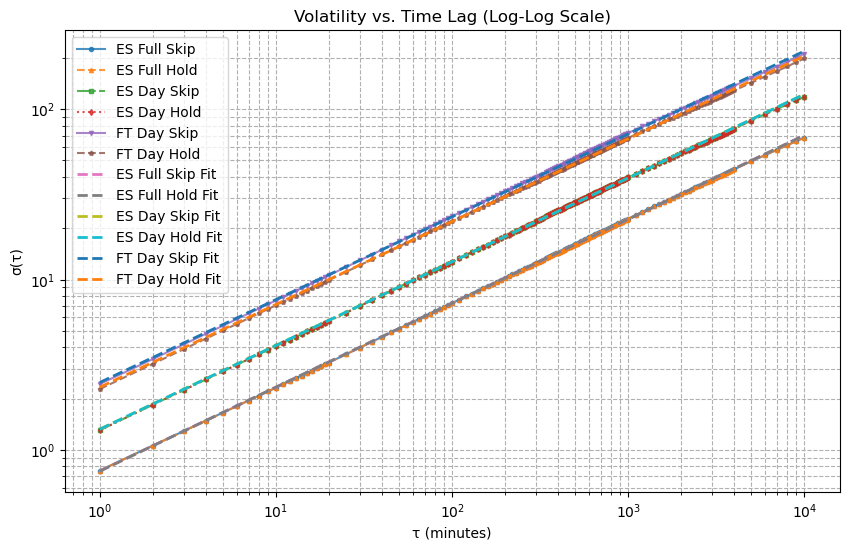

In [6]:
#Overlay the fitted power-law curves on the log-log plot:
plt.figure(figsize=(10, 6))
plt.loglog(tau_values, sigma_es_skip_full, label='ES Full Skip', marker='o', markersize=3, linestyle='-', alpha=0.8)
plt.loglog(tau_values, sigma_es_hold_full, label='ES Full Hold', marker='^', markersize=3, linestyle='--', alpha=0.8)
plt.loglog(tau_values, sigma_es_skip_day, label='ES Day Skip', marker='s', markersize=3, linestyle='-.', alpha=0.8)
plt.loglog(tau_values, sigma_es_hold_day, label='ES Day Hold', marker='d', markersize=3, linestyle=':', alpha=0.8)
plt.loglog(tau_values, sigma_ft_skip, label='FT Day Skip', marker='v', markersize=3, linestyle='-', alpha=0.8)
plt.loglog(tau_values, sigma_ft_hold, label='FT Day Hold', marker='p', markersize=3, linestyle='--', alpha=0.8)

# Overlay the fitted power-law curves using the regression parameters from results.
for key, (slope, intercept, _) in results.items():
    # Compute fitted sigma using the equation: sigma = 10^(intercept) * tau^(slope)
    fitted_sigma = 10**intercept * tau_values**slope
    plt.loglog(tau_values, fitted_sigma, label=f'{key} Fit', linestyle='--', linewidth=2)

plt.xlabel('τ (minutes)')
plt.ylabel('σ(τ)')
plt.title('Volatility vs. Time Lag (Log-Log Scale)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

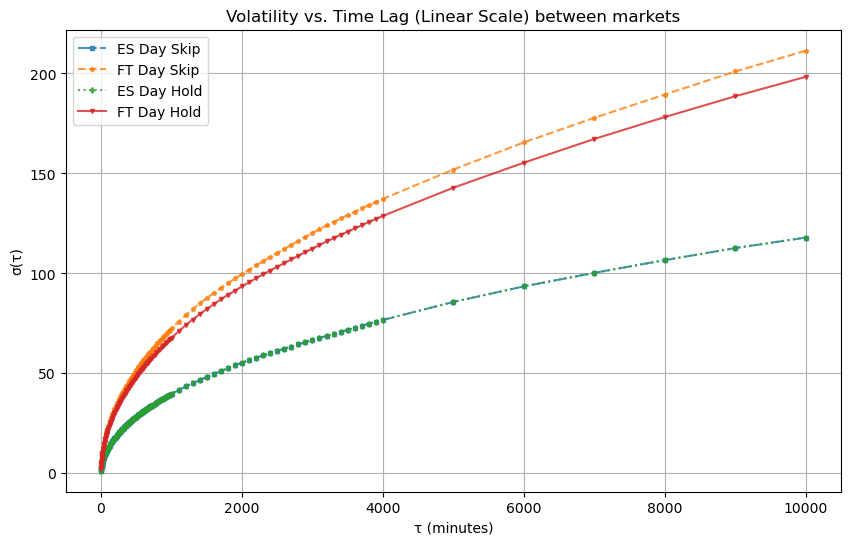

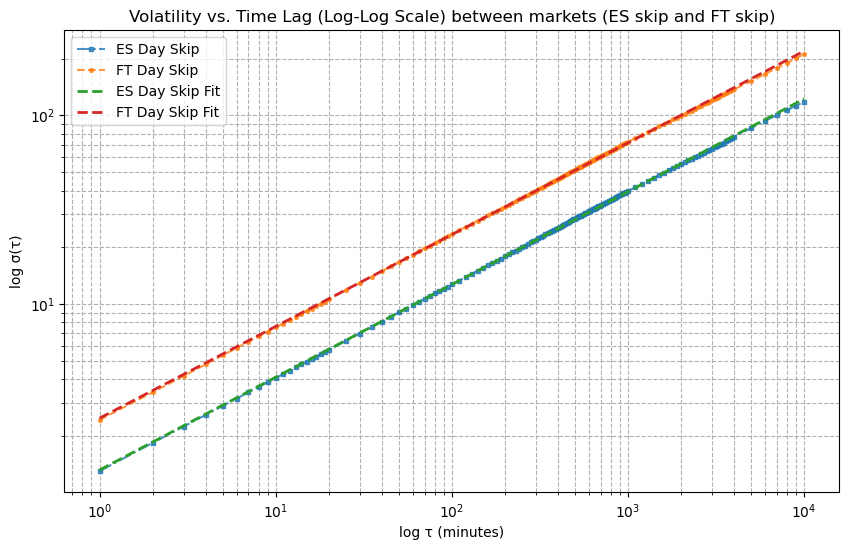

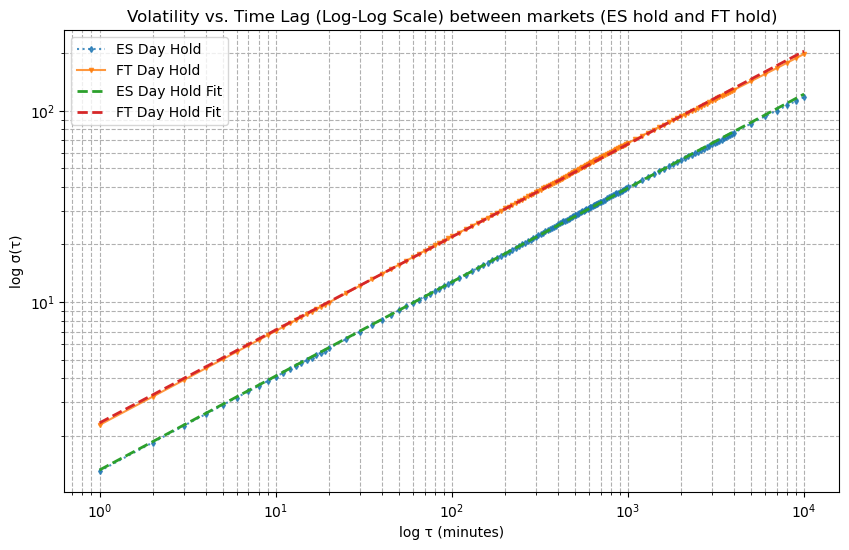

In [7]:
# Specific comparison between datasets of ES Day and FT Day with Skip and Hold in linear scale
plt.figure(figsize=(10, 6))
plt.plot(tau_values, sigma_es_skip_day, label='ES Day Skip', marker='s', markersize=3, linestyle='-.', alpha=0.8)
plt.plot(tau_values, sigma_ft_skip, label='FT Day Skip', marker='p', markersize=3, linestyle='--', alpha=0.8)
plt.plot(tau_values, sigma_es_hold_day, label='ES Day Hold', marker='d', markersize=3, linestyle=':', alpha=0.8)
plt.plot(tau_values, sigma_ft_hold, label='FT Day Hold', marker='v', markersize=3, linestyle='-', alpha=0.8)
plt.xlabel('τ (minutes)')
plt.ylabel('σ(τ)')
plt.title('Volatility vs. Time Lag (Linear Scale) between markets')
plt.legend()
plt.grid(True)
plt.show()

# Specific comparison between datasets of ES Day and FT Day with Skip in log scale
plt.figure(figsize=(10, 6))
plt.loglog(tau_values, sigma_es_skip_day, label='ES Day Skip', marker='s', markersize=3, linestyle='-.', alpha=0.8)
plt.loglog(tau_values, sigma_ft_skip, label='FT Day Skip', marker='p', markersize=3, linestyle='--', alpha=0.8)

# Define the keys to be included
selected_keys = ['ES Day Skip', 'FT Day Skip']

# Overlay the fitted power-law curves using the regression parameters from results.
for key in selected_keys:
    # Compute fitted sigma using the equation: sigma = 10^(intercept) * tau^(slope)
    slope, intercept, _ = results[key]
    fitted_sigma = 10**intercept * tau_values**slope
    plt.loglog(tau_values, fitted_sigma, label=f'{key} Fit', linestyle='--', linewidth=2)

# Plot the graph
plt.xlabel('log τ (minutes)')
plt.ylabel('log σ(τ)')
plt.title('Volatility vs. Time Lag (Log-Log Scale) between markets (ES skip and FT skip)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Specific comparison between datasets of ES Day and FT Day with Hold in log scale
plt.figure(figsize=(10, 6))
plt.loglog(tau_values, sigma_es_hold_day, label='ES Day Hold', marker='d', markersize=3, linestyle=':', alpha=0.8)
plt.loglog(tau_values, sigma_ft_hold, label='FT Day Hold', marker='v', markersize=3, linestyle='-', alpha=0.8)

# Define the keys to be included
selected_keys = ['ES Day Hold', 'FT Day Hold']

# Overlay the fitted power-law curves using the regression parameters from results.
for key in selected_keys:
    # Compute fitted sigma using the equation: sigma = 10^(intercept) * tau^(slope)
    slope, intercept, _ = results[key]
    fitted_sigma = 10**intercept * tau_values**slope
    plt.loglog(tau_values, fitted_sigma, label=f'{key} Fit', linestyle='--', linewidth=2)

# Plot the graph
plt.xlabel('log τ (minutes)')
plt.ylabel('log σ(τ)')
plt.title('Volatility vs. Time Lag (Log-Log Scale) between markets (ES hold and FT hold)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

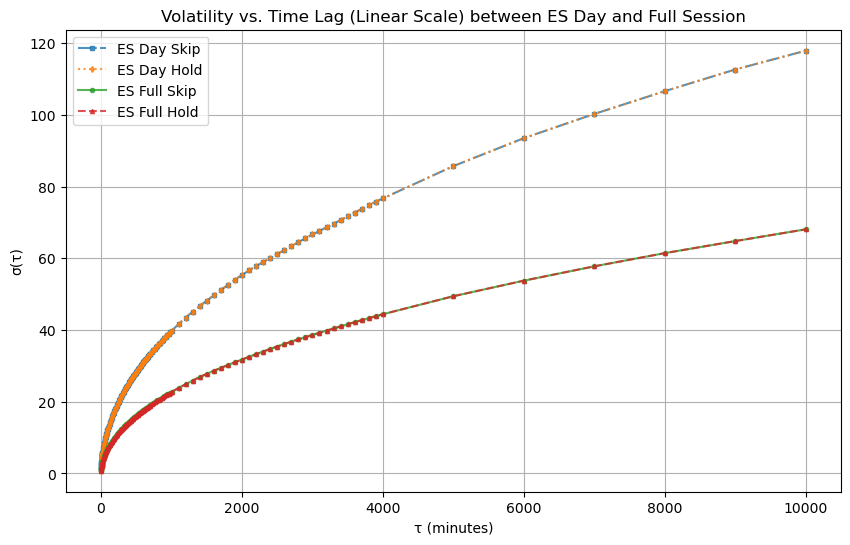

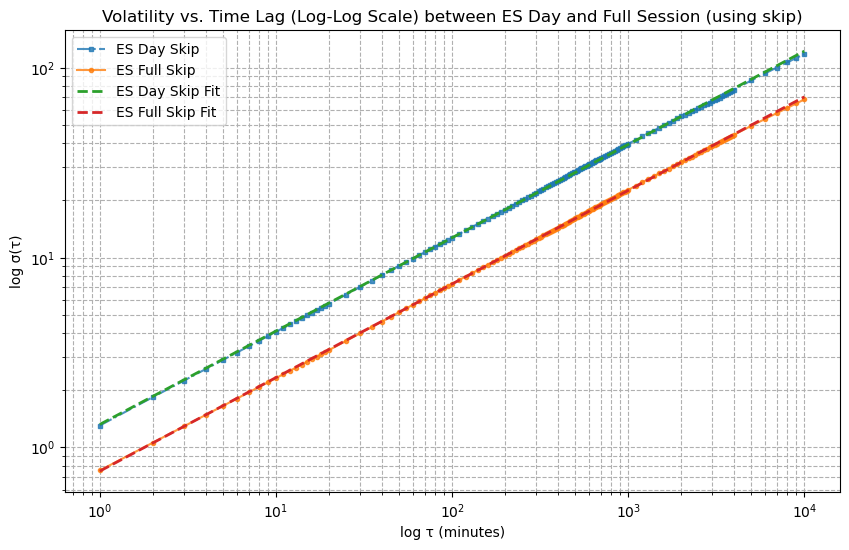

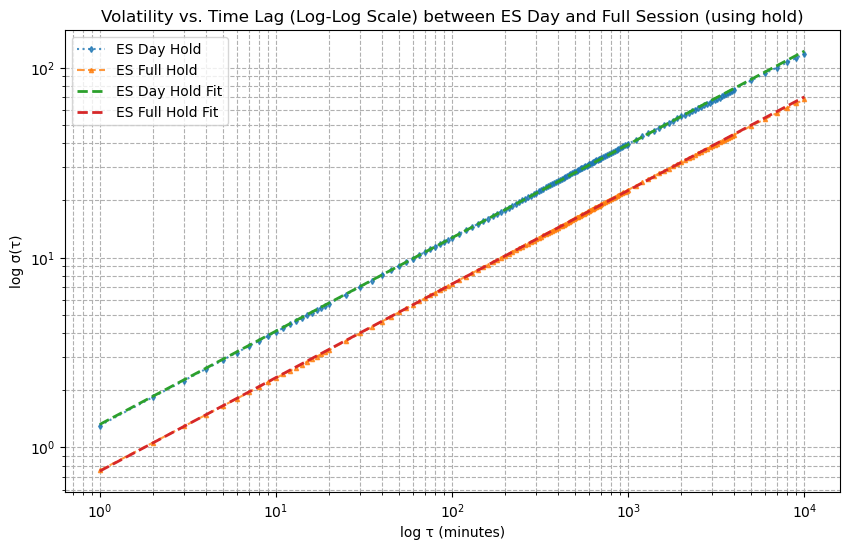

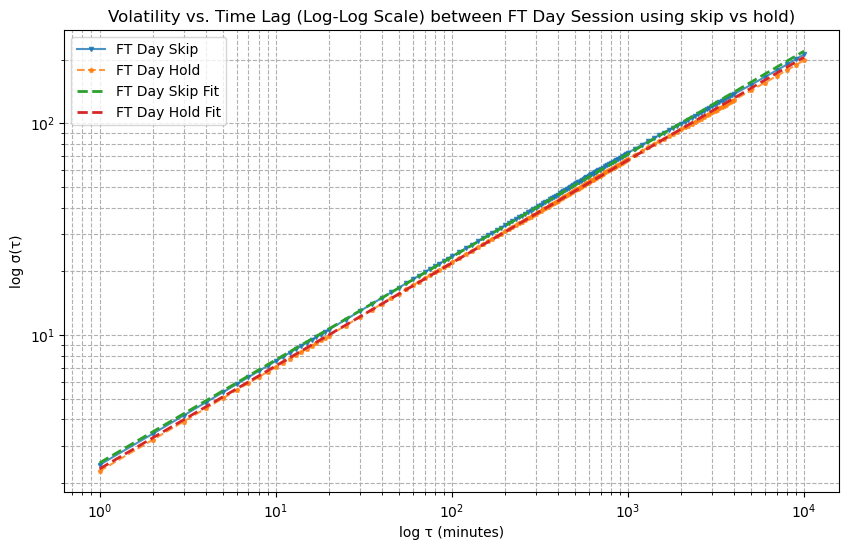

In [8]:
# Specific comparison between datasets of ES Day and Full Session with Skip and Hold in linear scale
plt.figure(figsize=(10, 6))
plt.plot(tau_values, sigma_es_skip_day, label='ES Day Skip', marker='s', markersize=3, linestyle='-.', alpha=0.8)
plt.plot(tau_values, sigma_es_hold_day, label='ES Day Hold', marker='d', markersize=3, linestyle=':', alpha=0.8)
plt.plot(tau_values, sigma_es_skip_full, label='ES Full Skip', marker='o', markersize=3, linestyle='-', alpha=0.8)
plt.plot(tau_values, sigma_es_hold_full, label='ES Full Hold', marker='^', markersize=3, linestyle='--', alpha=0.8)
plt.xlabel('τ (minutes)')
plt.ylabel('σ(τ)')
plt.title('Volatility vs. Time Lag (Linear Scale) between ES Day and Full Session')
plt.legend()
plt.grid(True)
plt.show()

# Specific comparison between datasets of ES Day and Full Session with Skip in log scale
plt.figure(figsize=(10, 6))
plt.loglog(tau_values, sigma_es_skip_day, label='ES Day Skip', marker='s', markersize=3, linestyle='-.', alpha=0.8)
plt.loglog(tau_values, sigma_es_skip_full, label='ES Full Skip', marker='o', markersize=3, linestyle='-', alpha=0.8)

# Define the keys to be included
selected_keys = ['ES Day Skip', 'ES Full Skip']

# Overlay the fitted power-law curves using the regression parameters from results.
for key in selected_keys:
    # Compute fitted sigma using the equation: sigma = 10^(intercept) * tau^(slope)
    slope, intercept, _ = results[key]
    fitted_sigma = 10**intercept * tau_values**slope
    plt.loglog(tau_values, fitted_sigma, label=f'{key} Fit', linestyle='--', linewidth=2)

# Plot the graph
plt.xlabel('log τ (minutes)')
plt.ylabel('log σ(τ)')
plt.title('Volatility vs. Time Lag (Log-Log Scale) between ES Day and Full Session (using skip)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Specific comparison between datasets of ES Day and Full Session with Hold in log scale
plt.figure(figsize=(10, 6))
plt.loglog(tau_values, sigma_es_hold_day, label='ES Day Hold', marker='d', markersize=3, linestyle=':', alpha=0.8)
plt.loglog(tau_values, sigma_es_hold_full, label='ES Full Hold', marker='^', markersize=3, linestyle='--', alpha=0.8)

# Define the keys to be included
selected_keys = ['ES Day Hold', 'ES Full Hold']

# Overlay the fitted power-law curves using the regression parameters from results.
for key in selected_keys:
    # Compute fitted sigma using the equation: sigma = 10^(intercept) * tau^(slope)
    slope, intercept, _ = results[key]
    fitted_sigma = 10**intercept * tau_values**slope
    plt.loglog(tau_values, fitted_sigma, label=f'{key} Fit', linestyle='--', linewidth=2)

# Plot the graph
plt.xlabel('log τ (minutes)')
plt.ylabel('log σ(τ)')
plt.title('Volatility vs. Time Lag (Log-Log Scale) between ES Day and Full Session (using hold)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Specific comparison between datasets of FT Day Session with Hold and Skip in log scale
plt.figure(figsize=(10, 6))
plt.loglog(tau_values, sigma_ft_skip, label='FT Day Skip', marker='v', markersize=3, linestyle='-', alpha=0.8)
plt.loglog(tau_values, sigma_ft_hold, label='FT Day Hold', marker='p', markersize=3, linestyle='--', alpha=0.8)

# Define the keys to be included
selected_keys = ['FT Day Skip', 'FT Day Hold']

# Overlay the fitted power-law curves using the regression parameters from results.
for key in selected_keys:
    # Compute fitted sigma using the equation: sigma = 10^(intercept) * tau^(slope)
    slope, intercept, _ = results[key]
    fitted_sigma = 10**intercept * tau_values**slope
    plt.loglog(tau_values, fitted_sigma, label=f'{key} Fit', linestyle='--', linewidth=2)

# Plot the graph
plt.xlabel('log τ (minutes)')
plt.ylabel('log σ(τ)')
plt.title('Volatility vs. Time Lag (Log-Log Scale) between FT Day Session using skip vs hold)')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:
# Define a function to plot normalized histograms
def plot_normalized_hist(dfs):
    for label, df in dfs.items():
        df["DeltaP"] = df["Close"].diff()
        sns.histplot(df["DeltaP"].dropna(), bins=50, stat="density", kde=True)
        plt.title(f"Normalized Histogram: {label}")
        plt.xlabel(r"\Delta p")
        plt.ylabel("Probability Density")
        plt.show()

# Example usage
dfs_norm_to_plot = {
    "FTSE100 (Handled by Skipping)": df_FT1skip,
    "FTSE100 (Handled by Holding Last Value": df_FT1hold,
    "SP500 (Handled by Skipping)": df_ES1skip_day,
    "SP500 (Handled by Holding Last Value ": df_ES1hold_day
}

plot_normalized_hist(dfs_norm_to_plot)

In [ ]:
# Define a function to plot normalized histograms
def plot_normalized_hist(dfs):
    for label, df in dfs.items():
        df["DeltaP"] = df["Close"].diff()
        sns.histplot(df["DeltaP"].dropna(), bins=50, stat="density", kde=True)
        plt.title(f"Normalized Histogram: {label}")
        plt.xlabel(r"\Delta p")
        plt.ylabel("Probability Density")
        plt.show()

# Example usage
dfs_norm_to_plot = {
    "FTSE100 (Handled by Skipping)": df_FT1skip,
    "FTSE100 (Handled by Holding Last Value": df_FT1hold,
    "SP500 (Handled by Skipping)": df_ES1skip_day,
    "SP500 (Handled by Holding Last Value ": df_ES1hold_day
}

plot_normalized_hist(dfs_norm_to_plot)

In [ ]:
# Define a function to plot log-lin distributions
def plot_log_lin_distributions(dfs):
    """
    For each DataFrame, calculate Δp, create a symmetric histogram of P(x,τ=1),
    and plot log10 P(x) vs x on a log-lin scale.
    """
    plt.figure(figsize=(8,6))
    for label, df in dfs.items():
        delta_p = df["Close"].diff().dropna()

        # Define symmetrical limits
        sym_limit = 400

        # Create histogram over symmetric range
        bins = 50
        counts, bin_edges = np.histogram(delta_p, bins=bins,
                                         range=(-sym_limit, sym_limit),
                                         density=True)
        centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Avoid log(0) by filtering out zero counts
        # Filter out zero counts
        nonzero_mask = (counts > 0)
        counts = counts[nonzero_mask]
        centers = centers[nonzero_mask]

        # Now take the log
        log_counts = np.log10(counts)

        plt.plot(centers, log_counts, label=label)
        plt.xlim(-sym_limit, sym_limit)

    plt.xlabel("x")
    plt.ylabel("log10 P(x, τ=1)")
    plt.legend()
    plt.title("Log-Lin Plot of P(x, τ=1)")
    plt.show()

# plot combined log-lin distributions
dfs_log_lin = {
    "FT_skip": df_FT1skip,
    "FT_hold": df_FT1hold,
    "ES_skip": df_ES1skip_day,
    "ES_hold": df_ES1hold_day
}

plot_log_lin_distributions(dfs_log_lin)

In [ ]:
# plot PDF comparing empirical and theoretical distributions
def plot_empirical_vs_gaussian(dfs):
    for label, df in dfs.items():
        plt.figure(figsize=(6,4))
        delta_p = df["Close"].diff().dropna()
        mu = delta_p.mean()
        sigma = delta_p.std()

        # Define symmetric range
        sym_limit = 400

        # Create histogram over symmetric range
        bins = 50
        counts, bin_edges = np.histogram(delta_p, bins=bins,
                                         range=(-sym_limit, sym_limit),
                                         density=True)
        centers = (bin_edges[:-1] + bin_edges[1:]) / 2

        # Avoid log(0) by filtering out zero counts
        # Filter out zero counts
        nonzero_mask = (counts > 0)
        counts = counts[nonzero_mask]
        centers = centers[nonzero_mask]

        # Now take the log
        log_counts = np.log10(counts)

        plt.plot(centers, log_counts, label=label)
        plt.xlim(-sym_limit, sym_limit)

        # Create Gaussian PDF
        x_vals = np.linspace(-sym_limit, sym_limit, 500)
        gauss_pdf = norm.pdf(x_vals, loc=mu, scale=sigma)

        # Filter out zero from the Gaussian PDF
        gauss_mask = (gauss_pdf > 0)
        x_vals = x_vals[gauss_mask]
        gauss_pdf = gauss_pdf[gauss_mask]
        log_gauss = np.log10(gauss_pdf)

        plt.plot(x_vals, log_gauss, 'r-', label="Gaussian")


        plt.title(f"{label}: Empirical vs. Gaussian")
        plt.xlabel("x")
        plt.ylabel("log10 P(x, τ=1)")
        plt.xlim(-sym_limit, sym_limit)
        plt.ylim(-8, 0)
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()

# Example usage
dfs_gauss_FT_skip = {"FTSE100 (Handled by Skipping)": df_FT1skip,}
dfs_gauss_FT_hold = {"FTSE100 (Handled by Holding Last Value": df_FT1hold,}
dfs_gauss_ES_skip = {"SP500 (Handled by Skipping)": df_ES1skip_day,}
dfs_gauss_ES_hold = {"SP500 (Handled by Holding Last Value ": df_ES1hold_day}

plot_empirical_vs_gaussian(dfs_gauss_FT_skip)
plot_empirical_vs_gaussian(dfs_gauss_FT_hold)
plot_empirical_vs_gaussian(dfs_gauss_ES_skip)
plot_empirical_vs_gaussian(dfs_gauss_ES_hold)

In [ ]:
# Generalize to other tau values
def analyze_with_shifts(dfs, tau_values):
    """
    For each tau, calculate Δp, create a symmetric histogram of P(x,τ=tau), and plot log10 P(x) vs x on a log-lin scale with an overlay of a theoretical Gaussian PDF.
    """
    for tau in tau_values:
        for label, df in dfs.items():
            delta_p = df["Close"].diff(tau).dropna()
            mu = delta_p.mean()
            sigma = delta_p.std()
            sym_limit = 400
            bins = 50

            # --- Plot normalized histogram ---
            plt.figure(figsize=(6,4))
            sns.histplot(delta_p, bins=bins, stat="density", kde=True)
            plt.title(f"Normalized Histogram (tau={tau}): {label}")
            plt.xlabel(r"\Delta p")
            plt.ylabel("Probability Density")
            plt.tight_layout()
            plt.show()

            # --- Plot combined log-lin distribution---
            plt.figure(figsize=(6,4))

            counts, bin_edges = np.histogram(delta_p, bins=bins,
                                         range=(-sym_limit, sym_limit),
                                         density=True)
            centers = (bin_edges[:-1] + bin_edges[1:]) / 2

            # Avoid log(0) by filtering out zero counts
            # Filter out zero counts
            nonzero_mask = (counts > 0)
            counts = counts[nonzero_mask]
            centers = centers[nonzero_mask]

            # Now take the log
            log_counts = np.log10(counts)

            plt.plot(centers, log_counts, label=f"Empirical (tau={tau})")
            plt.xlim(-sym_limit, sym_limit)

            # Create Gaussian PDF
            x_vals = np.linspace(-sym_limit, sym_limit, 500)
            gauss_pdf = norm.pdf(x_vals, loc=mu, scale=sigma)

            # Filter out zero from the Gaussian PDF
            gauss_mask = (gauss_pdf > 0)
            x_vals = x_vals[gauss_mask]
            gauss_pdf = gauss_pdf[gauss_mask]
            log_gauss = np.log10(gauss_pdf)

            plt.plot(x_vals, log_gauss, 'r-', label="Gaussian")

            plt.title(f"{label}: Empirical vs. Gaussian, tau={tau}")
            plt.xlabel("x")
            plt.ylabel("log10 P(x, tau)")
            plt.xlim(-sym_limit, sym_limit)
            plt.ylim(-8, 0)
            plt.legend(loc='upper right')
            plt.tight_layout()
            plt.show()

# Example usage
dfs_to_analyze = {
    "FT_skip": df_FT1skip,
    "FT_hold": df_FT1hold,
    "ES_skip": df_ES1skip_day,
    "ES_hold": df_ES1hold_day,
}
analyze_with_shifts(dfs_to_analyze, tau_values=[5, 30, 60, 120, 180, 360])

In [ ]:
# Estimate the alpha parameter of the fat tailed Lévy distribution
def estimate_alpha(dfs):
    """
    Estimate Lévy exponent α from P(0, τ) vs τ on a log-log scale.

    Parameters:
    P(0, τ): PDF Value at x=0
    τ: Time interval
    a = -1/slope as deduced from Levy stable distribution
    """
    for label, df in dfs.items():
        x_vals, y_vals = [], []

        # Collect data for each tau from 1 to 360
        for tau in range(1,361):
            delta_p = df["Close"].diff(tau).dropna()
            if len(delta_p) == 0:
                continue

            # Probability that Delta p == 0
            p_zero = np.sum(delta_p == 0) / len(delta_p)
            if p_zero > 0:
                x_vals.append(np.log(tau))
                y_vals.append(np.log(p_zero))

        # Convert to arrays
        x_vals = np.array(x_vals)
        y_vals = np.array(y_vals)

        # Handle edge cases
        if len(x_vals) < 2:
            print(f"No valid data for {label}")
            continue

        # Linear regression
        slope, intercept = np.polyfit(x_vals, y_vals, 1)
        r = np.corrcoef(x_vals, y_vals)[0, 1]
        r_sq = r**2
        alpha = -1.0 / slope

        # Plot
        plt.figure(figsize=(6,4))
        # Regression line
        reg_x = np.linspace(x_vals.min(), x_vals.max(), 100)
        reg_y = slope * reg_x + intercept
        plt.plot(reg_x, reg_y, 'r--', label="Fit")

        plt.xlabel(r"log(tau)")
        plt.ylabel(r"log(P(0,tau))")
        plt.title(label)
        plt.legend()
        # Label alpha in top right corner
        plt.text(0.95, 0.95,
                 f"alpha={alpha:.4f}\nr^2={r_sq:.4f}",
                 transform=plt.gca().transAxes,
                 ha='right', va='top')
        plt.tight_layout()
        plt.show()

# Example usage
dfs_to_estimate = {
    "FT_skip": df_FT1skip,
    "FT_hold": df_FT1hold,
    "ES_skip": df_ES1skip_day,
    "ES_hold": df_ES1hold_day
}
estimate_alpha(dfs_to_estimate)